In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('_DATA/crypto/BTC-USD_2019.12.17-2021.12.17.csv')
# add column for close price on previous day
dataset['Volume-Previous-Day'] = dataset['Volume'].shift(1)
dataset = dataset.dropna()
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volume-Previous-Day
1,2019-12-18,6647.698242,7324.984863,6540.049316,7276.802734,7276.802734,3.183652e+10,2.236380e+10
2,2019-12-19,7277.590820,7346.602539,7041.381836,7202.844238,7202.844238,2.590460e+10,3.183652e+10
3,2019-12-20,7208.636719,7257.921875,7086.124023,7218.816406,7218.816406,2.263382e+10,2.590460e+10
4,2019-12-21,7220.593750,7223.226074,7112.735840,7191.158691,7191.158691,1.931255e+10,2.263382e+10
5,2019-12-22,7191.188477,7518.033203,7167.179199,7511.588867,7511.588867,2.313454e+10,1.931255e+10


In [2]:
# data preprocessing
X = dataset[['Open', 'Volume-Previous-Day']].values
y = dataset['Close'].values

In [3]:
# split data to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0, shuffle = False)

print("Train size =", len(y_train))
print("Test size =", len(y_test))

Train size = 485
Test size = 239


In [4]:
import time
start_time_ms = time.time() * 1000

# Fitting the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)

end_time_ms = time.time() * 1000
print("Prediction completed. Time spent = %.3f seconds" % ((end_time_ms - start_time_ms) / 1000))

Prediction completed. Time spent = 0.420 seconds


In [5]:
# diplay stats 
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
#print("y_test", y_test)
#print("y_pred", y_pred)
print('Coefficients: \n', regressor.coef_)
print('Intercepts:', regressor.intercept_)    # the intercept (often labeled the constant) 
                                                 # is the expected mean value of Y when all X=0
print('Score of the model: %.2f' % regressor.score(X_test, y_test))
print('R^2 score: %.2f' % r2_score(y_test, y_pred))
print("RMSE (root mean square error): %.2f" % sqrt(mean_squared_error(y_test, y_pred)))

Coefficients: 
 [ 1.00212133e+00 -1.04434368e-09]
Intercepts: 87.63371261620341
Score of the model: 0.96
R^2 score: 0.96
RMSE (root mean square error): 1910.60


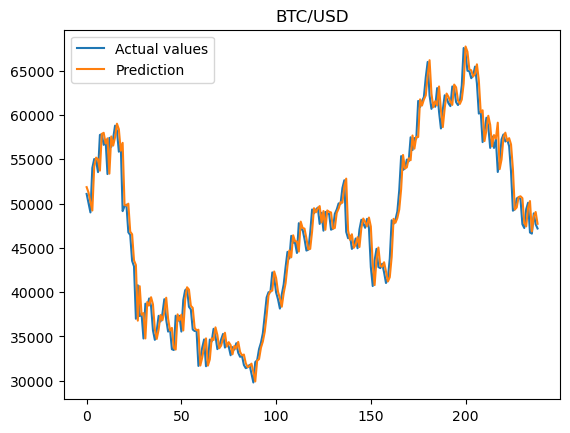

In [6]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Actual values', 'Prediction'])
plt.title("BTC/USD")
plt.show()